# Classic Mean Risk Portfolio Optimization with Riskfolio-Lib

This tutorial demonstrates how to perform classic mean-risk portfolio optimization using the Riskfolio-Lib library in Python. The focus is on building and optimizing portfolios using several risk measures and constraints, leveraging historical stock data.


Before you can use `riskfolio-lib` functionality, you must install the following packages (install only once):

In [7]:
#!pip install cvxpy
#!pip install pybind11
#!pip install riskfolio-lib

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

## 1. Downloading the data:

The first step is downloading historical stock data for a group of selected assets using the `yfinance` library. This tutorial provides an example using 25 different stocks over a defined date range:

In [12]:
# Select your desired date range for financial data:
start = '2016-01-01'
end = '2019-12-30'

# Select your tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [14]:
# Calculating returns
Y = data[assets].pct_change().dropna()
Y.head()

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00+00:00,-2.0256%,0.4057%,0.4036%,1.9692%,0.0179%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5882%,0.0212%,2.8236%,0.9759%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06 00:00:00+00:00,-11.4863%,-1.5879%,0.2411%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07 00:00:00+00:00,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5493%,-3.0019%
2016-01-08 00:00:00+00:00,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11 00:00:00+00:00,-4.3383%,0.1692%,-1.6851%,-1.0216%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Mean Variance Portfolios

Using Riskfolio-Lib, we will calculate the optimal portfolio that maximizes the Sharpe ratio first. This involves specifying methods for estimating the expected returns (`method_mu='hist'`) and the covariance matrix (`method_cov='hist'`) based on historical data.

The portfolio is then optimized using the following parameters:
- Model: `Classic`
- Risk measure: `MV` (Mean-Variance)
- Objective: `Sharpe` (Maximizing risk-adjusted return)

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [16]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5018%,0.0000%,0.0000%,8.4808%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8262%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2740%,0.0000%


### 2.2 Plotting portfolio composition

The composition of the portfolio is visualized in a pie chart, displaying the weight of each asset in the optimized portfolio.

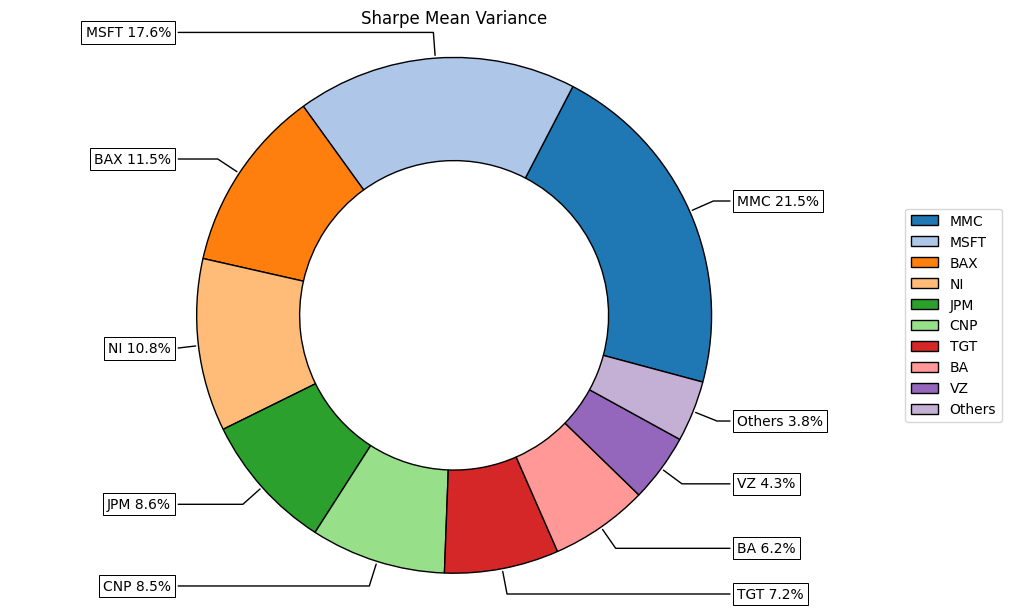

In [18]:
# Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, 
                 cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

The efficient frontier is calculated by estimating the risk-return profile for a range of portfolios, and the results are plotted. The frontier helps identify the portfolios with the highest return for each level of risk.

In [20]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9907%,3.2269%,0.0741%,0.0000%,2.8447%,...,11.4528%,0.0000%,14.9247%,0.1681%,6.5903%,4.0899%,0.0000%,0.0000%,8.2768%,0.0000%
1,0.0000%,2.0125%,8.4903%,0.7981%,1.6844%,8.5601%,2.1529%,1.3613%,0.0000%,1.0444%,...,13.4495%,0.0000%,9.2100%,0.0000%,5.5816%,5.5235%,0.0000%,0.0000%,8.7591%,0.0000%
2,0.0000%,2.8165%,9.3711%,0.0000%,1.1979%,9.1478%,1.7064%,1.7395%,0.0000%,0.0872%,...,14.2326%,0.0000%,6.4848%,0.0000%,5.1003%,6.0539%,0.0000%,0.0000%,9.0040%,0.0000%
3,0.0000%,3.4305%,9.9328%,0.0000%,0.5693%,9.5579%,1.0811%,1.9315%,0.0000%,0.0000%,...,14.7706%,0.0000%,3.6631%,0.0000%,4.2579%,6.4249%,0.0000%,0.0000%,9.2132%,0.0000%
4,0.0000%,3.9343%,10.3865%,0.0000%,0.0003%,9.8876%,0.3998%,2.0810%,0.0000%,0.0000%,...,15.1317%,0.0000%,1.0860%,0.0000%,3.3464%,6.7109%,0.0000%,0.0000%,9.2765%,0.0000%


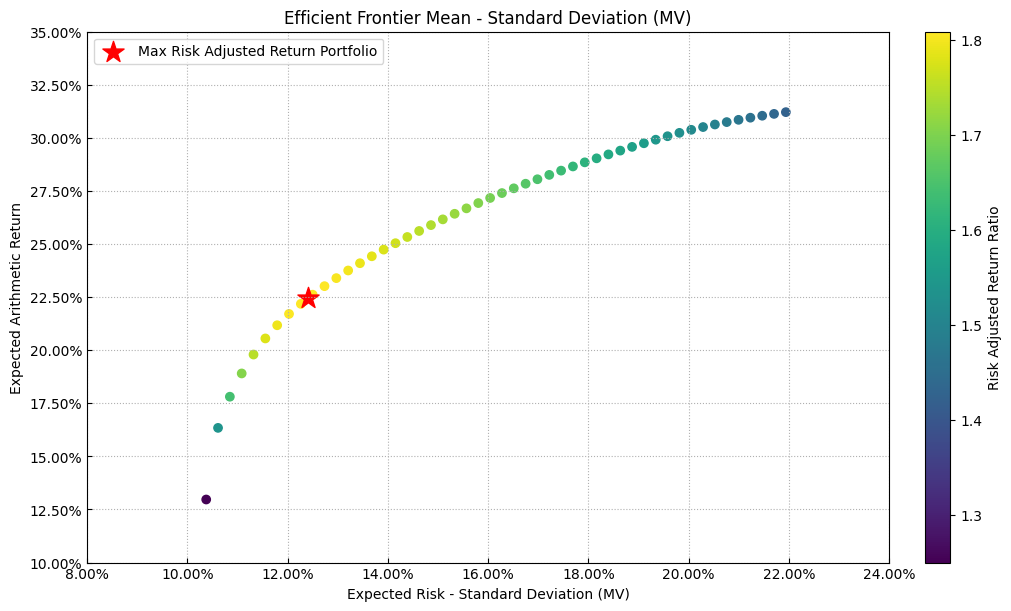

In [22]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

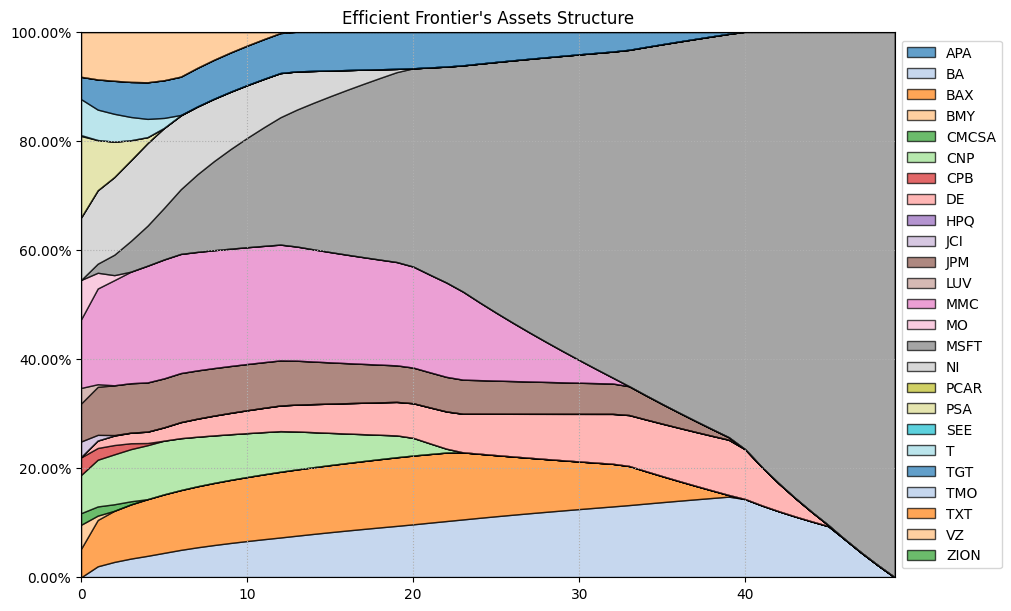

In [24]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [27]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,12.3508%,0.0000%,0.0000%,7.4900%,0.0000%,5.1440%,0.0000%,0.0000%,...,12.6858%,0.0000%,0.0000%,0.0000%,0.0000%,11.1968%,0.0000%,0.0000%,3.6761%,0.0000%


### 3.2 Plotting portfolio composition

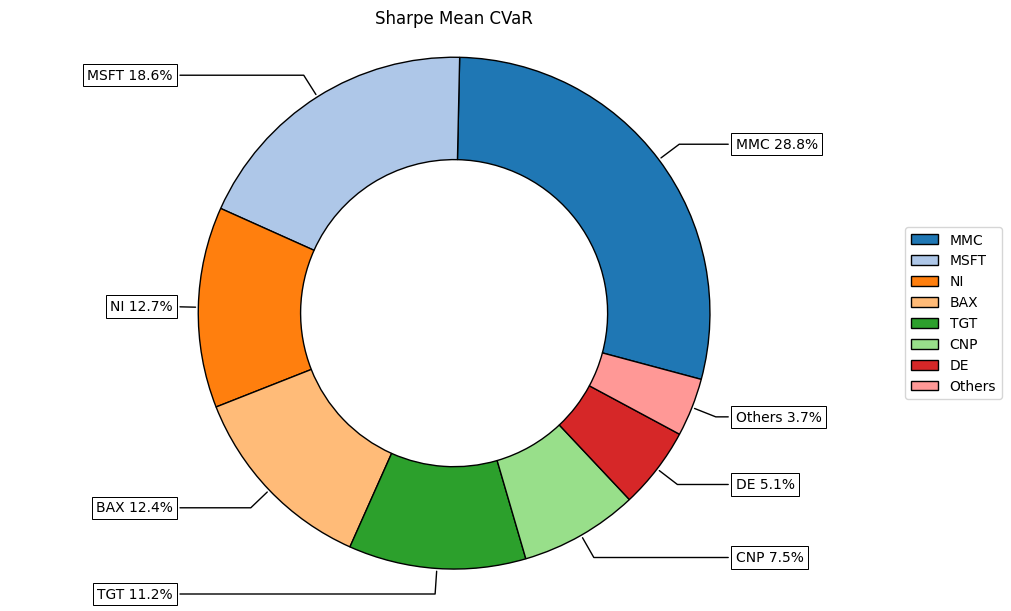

In [30]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [33]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,2.1562%,7.0923%,0.1948%,1.8678%,7.9952%,0.0000%,0.0000%,4.0584%,...,6.9444%,0.0000%,20.6084%,0.0000%,3.0318%,4.1822%,0.0000%,0.0000%,20.4702%,0.0000%
1,0.0000%,0.0000%,4.5452%,5.5632%,0.0000%,5.8124%,4.6605%,0.0000%,0.0000%,1.8856%,...,7.6677%,0.0000%,14.5025%,0.0000%,2.4023%,7.1312%,0.0000%,0.0000%,19.6508%,0.0000%
2,0.0000%,0.0000%,6.0529%,3.3836%,0.0000%,12.2795%,0.0000%,0.0000%,0.0000%,2.1416%,...,6.9000%,0.0000%,12.1775%,0.0000%,0.5923%,6.5756%,0.0000%,0.0000%,19.4959%,0.0000%
3,0.0000%,0.0000%,6.8325%,0.1520%,0.0000%,12.8563%,0.0000%,0.6425%,0.0000%,0.4068%,...,7.4387%,0.0000%,10.4811%,0.0000%,0.0000%,8.2858%,0.0000%,0.0000%,17.5789%,0.0000%
4,0.0000%,0.0000%,7.7458%,0.0000%,0.0000%,13.4336%,0.0000%,0.0000%,0.0000%,0.7570%,...,8.4889%,0.0000%,5.3131%,0.0000%,0.0000%,10.5393%,0.0000%,0.0000%,14.2236%,0.0000%


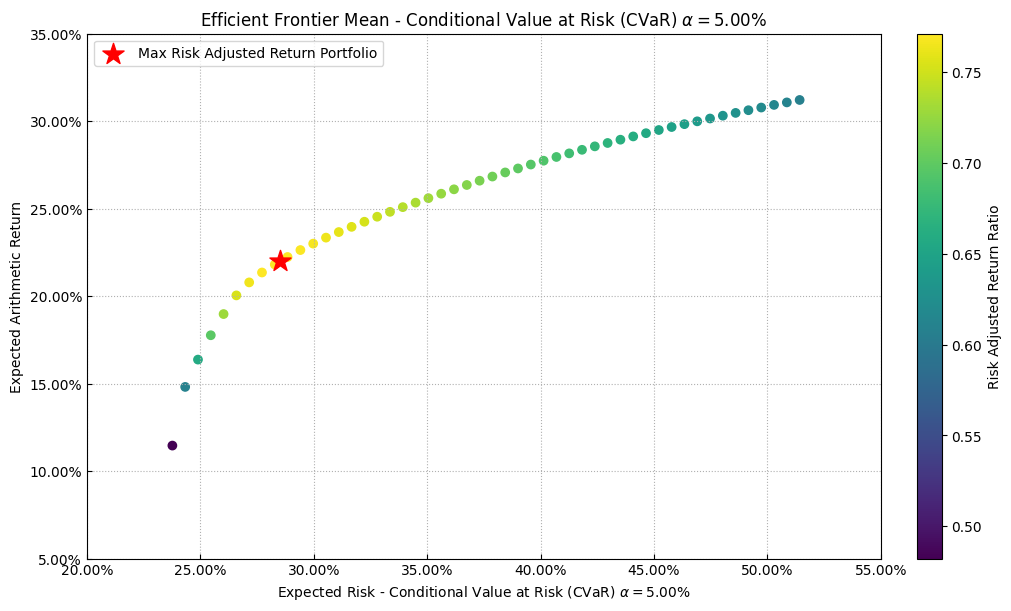

In [35]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

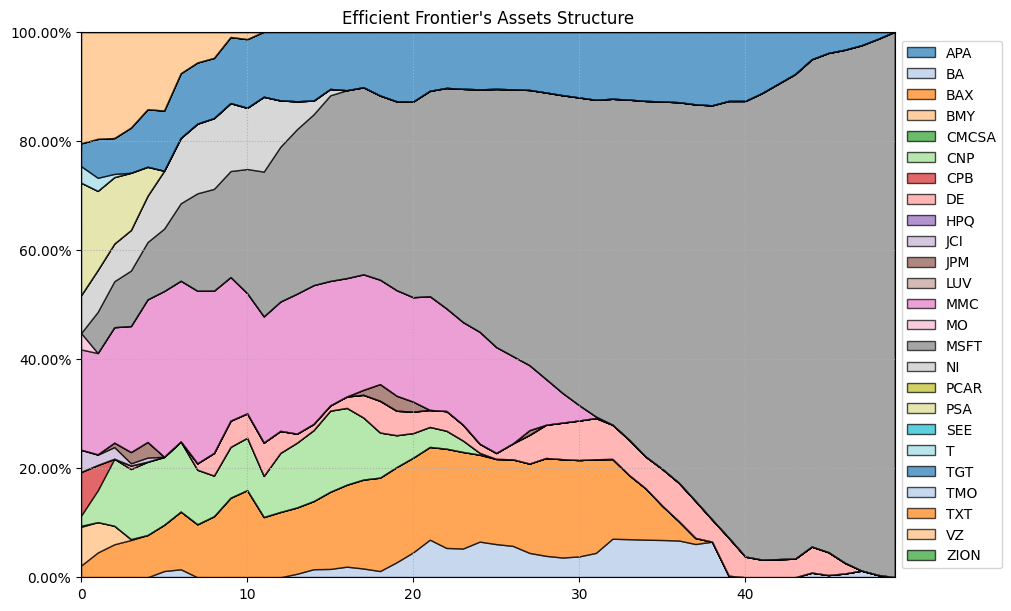

In [37]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In this example, we also calculate and compare portfolios for multiple risk measures, including:

- MV (Mean-Variance)
- MAD (Mean Absolute Deviation)
- CVaR (Conditional Value at Risk)
- MDD (Maximum Drawdown)
- and others

The comparison is visualized through bar charts of asset weights across different risk measures.


In [40]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [42]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.16%,7.63%,4.38%,6.11%,3.98%,0.00%,1.59%,0.00%,1.20%,6.79%,2.81%,6.34%,0.00%
BAX,11.50%,9.24%,10.37%,9.04%,10.62%,12.35%,4.72%,0.00%,0.00%,4.48%,0.00%,4.34%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.48%,7.21%,9.15%,5.96%,9.38%,7.49%,30.06%,28.96%,56.01%,13.49%,32.93%,18.16%,42.77%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.82%,2.73%,1.18%,2.33%,0.90%,5.14%,0.00%,0.00%,13.08%,1.49%,0.82%,1.01%,2.98%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

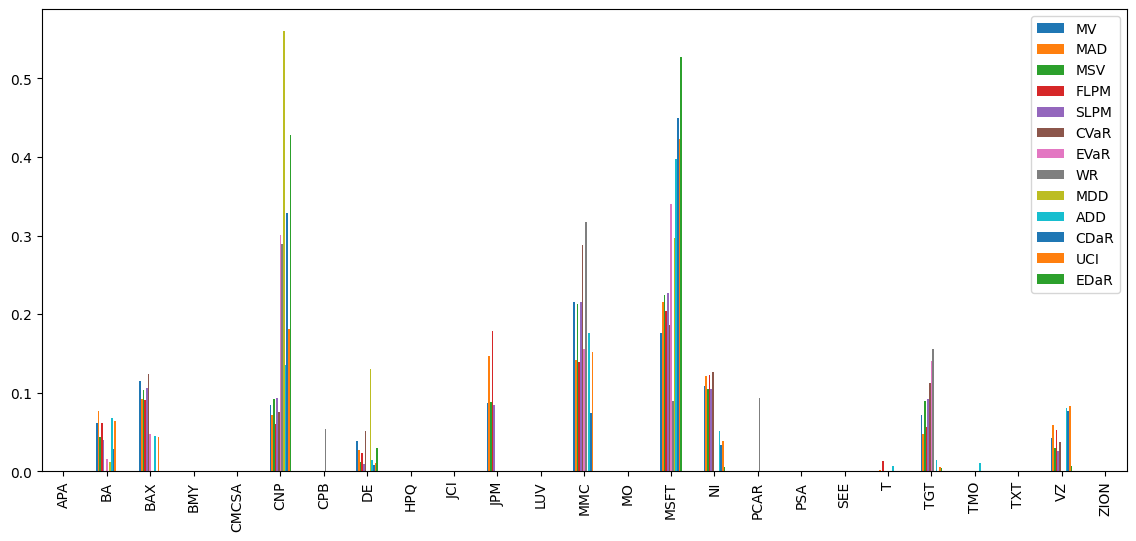

In [44]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4. Constraints on Assets and Assets Classes

In this section we focus on the application of constraints on the portfolio. For example, industry-specific constraints can be defined (e.g., limiting the weight of financial stocks to 20%).

After defining the constraints, the portfolio is re-optimized under these new conditions, ensuring that the solution meets all constraints while still aiming to maximize the Sharpe ratio.


### 4.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [46]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(asset_classes)
display(constraints)

,Assets,Industry
5,APA,Energy
24,BA,Financials
10,BAX,Health Care
11,BMY,Health Care
2,CMCSA,Consumer Discretionary
21,CNP,Utilities
3,CPB,Consumer Staples
16,DE,Industrials
18,HPQ,Information Technology
0,JCI,Consumer Discretionary


,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [48]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [51]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.7276%,10.0000%,0.0000%,1.7589%,10.0000%,0.0000%,9.0765%,0.0000%,0.0000%,...,10.0000%,0.0000%,0.0000%,0.0000%,0.0013%,9.4403%,9.7230%,0.0000%,10.0000%,0.0000%


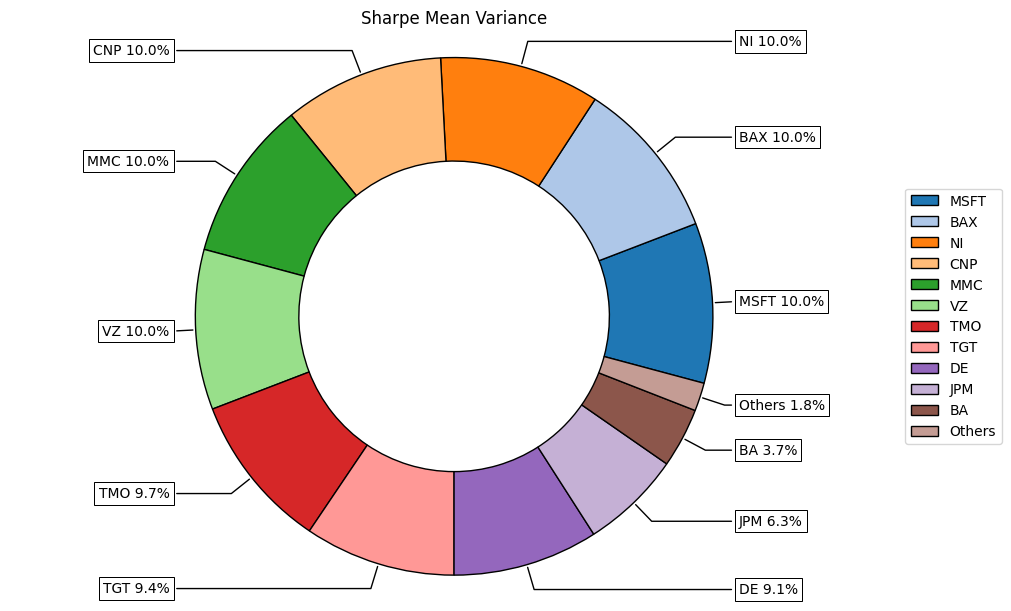

In [53]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [55]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
APA,Energy,0.0000%
BA,Financials,3.7276%
BAX,Health Care,10.0000%
BMY,Health Care,0.0000%
CMCSA,Consumer Discretionary,1.7589%
CNP,Utilities,10.0000%
CPB,Consumer Staples,0.0000%
DE,Industrials,9.0765%
HPQ,Information Technology,0.0000%
JCI,Consumer Discretionary,0.0000%


In [57]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,11.1993%
Consumer Staples,0.0000%
Energy,0.0000%
Financials,20.0000%
Health Care,19.7230%
Industrials,9.0765%
Information Technology,10.0000%
Materials,0.0000%
Telecommunications Services,10.0013%


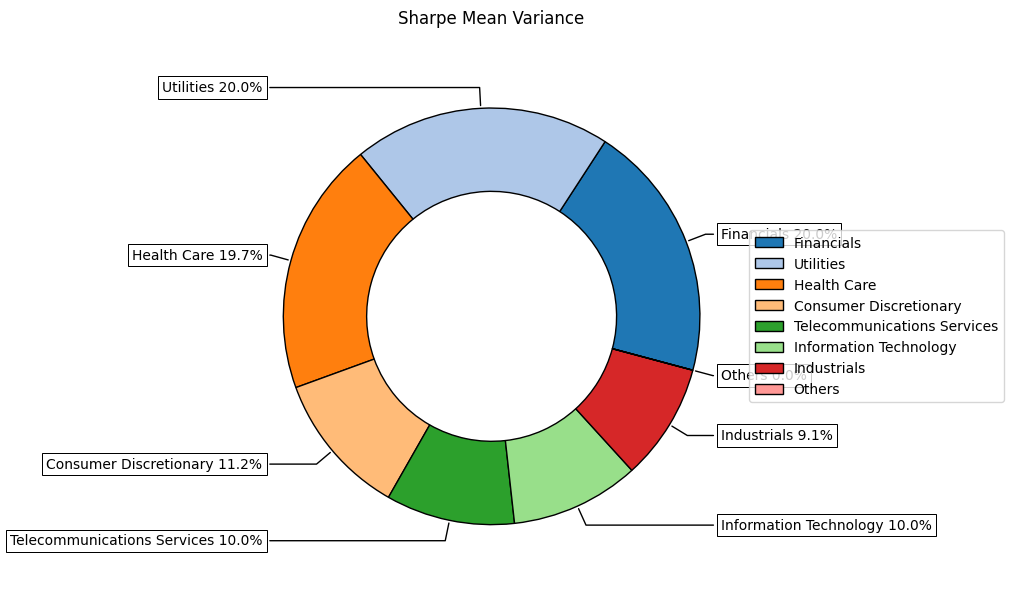

In [59]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)